In [1]:
from google.colab import files
uploaded=files.upload()

Saving impurity.xlsx to impurity.xlsx


In [ ]:
#documentation
#datset=buys_computer
#c.divya(monday)
#bl.en.u4cse21047

In [2]:
import pandas as pd
import numpy as np
df=pd.read_excel('impurity.xlsx')
df


age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no

In [3]:
#calculating the entropy
import pandas as pd
import numpy as np

def calculate_entropy(y):
    unique_labels = y.unique()
    entropy = 0
    total_samples = len(y)

    for label in unique_labels:
        label_count = len(y[y == label])
        p_label = label_count / total_samples
        entropy -= p_label * np.log2(p_label)

    return entropy
features = df.columns.difference(['buys_computer'])
entropy_dict = {}
for feature in features:
    entropy = 0
    unique_values = df[feature].unique()

    for value in unique_values:
        subset = df[df[feature] == value]
        entropy += len(subset) / len(df) * calculate_entropy(subset['buys_computer'])
    entropy_dict[feature] = entropy
for feature, entropy in entropy_dict.items():
    print(f"Entropy of {feature}: {entropy}")


Entropy of age: 0.6935361388961918
Entropy of credit_rating: 0.8921589282623617
Entropy of income: 0.9110633930116763
Entropy of student: 0.7884504573082896


In [4]:
import math

# Calculate entropy
def entropy(probabilities):
    entropy = 0
    for p in probabilities:
        if p != 0:
            entropy -= p * math.log2(p)
    return entropy

# Calculate Information Gain
def information_gain(df, feature, target):
    # Calculate the entropy of the target variable
    target_entropy = entropy([df[target].value_counts()[value] / len(df) for value in df[target].unique()])

    # Calculate the weighted average entropy for the given feature
    weighted_entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        subset_weight = len(subset) / len(df)
        subset_entropy = entropy([subset[target].value_counts()[v] / len(subset) for v in subset[target].unique()])
        weighted_entropy += subset_weight * subset_entropy

    # Calculate Information Gain
    information_gain = target_entropy - weighted_entropy
    return information_gain
df = pd.DataFrame(df)

# Calculate Information Gain for each feature
features = ['age', 'income', 'student', 'credit_rating']
target = 'buys_computer'
information_gains = {feature: information_gain(df, feature, target) for feature in features}

# Find the feature with the highest Information Gain (the root node)
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain}")

print(f"The root node for the decision tree is: {root_node}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
The root node for the decision tree is: age


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
X =df.iloc[:,0:3]
y =df.iloc[:,[4]]
X_train, X_test, y_train, y_test = train_test_split(X, y )
model.fit(X_train,y_train)

training_accuracy = model.score(X_train,y_train)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

ValueError: ignored

In [6]:
#for the above error we should do label encoding
from sklearn.preprocessing import LabelEncoder
k = LabelEncoder()
df['age'] = k.fit_transform(df['age'])
df['income'] = k.fit_transform(df['income'])
df['student'] = k.fit_transform(df['student'])
df['credit_rating'] = k.fit_transform(df['credit_rating'])
df['buys_computer'] = k.fit_transform(df['buys_computer'])
df





age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
a =df.iloc[:,0:3]
b =df.iloc[:,[4]]
X_train, X_test, y_train, y_test = train_test_split(a, b )
model.fit(X_train,y_train)

training_accuracy = model.score(X_train,y_train)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Training Set Accuracy: 0.8
Tree Depth: 3


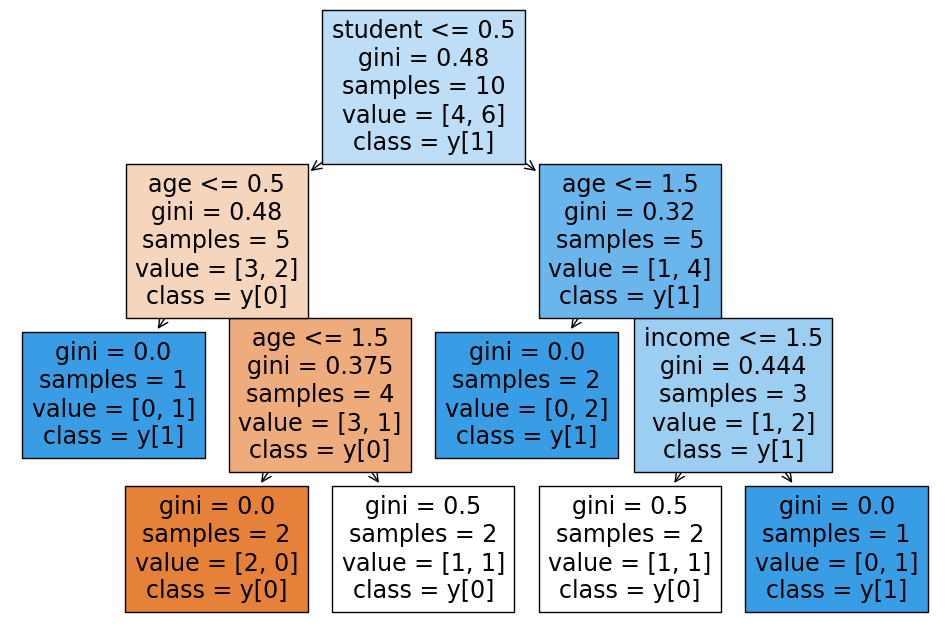

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


In [9]:
from google.colab import files
uploaded=files.upload()

Saving embeddingsdata.xlsx to embeddingsdata.xlsx


In [10]:
import pandas as pd
import numpy as np
df=pd.read_excel('embeddingsdata.xlsx')
df

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    0.009625 -0.029216  0.027109  0.023631 -0.004972  0.031757 -0.045125   
1   -0.007535 -0.039844  0.030167  0.031224  0.004742  0.028289 -0.068723   
2    0.022408 -0.030840  0.032328  0.046965  0.007798  0.025860 -0.065093   
3    0.019677 -0.034055  0.012662  0.070387 -0.011170  0.017842 -0.050945   
4    0.017678 -0.030323  0.012829  0.065267 -0.025161  0.011964 -0.050590   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.019743 -0.071799  0.022546  0.049042 -0.005767 -0.016275 -0.037731   
896  0.000186 -0.027604  0.010623  0.038237 -0.026675  0.020215 -0.040816   
897  0.018066 -0.032152  0.039794  0.047608  0.003898  0.024092 -0.056508   
898 -0.003492 -0.022739  0.021777  0.044054 -0.005621  0.013863 -0.079196   
899  0.013689 -0.037855  0.039763  0.035750  0.004115  0.005637 -0.050556   

      embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0    0.044483  0.019400 -0.017189  ...  -0.001972  -0.008154  -0.056139   
1    0.039153  0.019596 -0.027138  ...   0.008613  -0.006578  -0.034220   
2    0.035118  0.035359 -0.029205  ...   0.020413  -0.034288  -0.050649   
3    0.044878  0.034781 -0.025772  ...   0.002963  -0.018754  -0.053278   
4    0.042820  0.029161 -0.015004  ...   0.010192  -0.010147  -0.035857   
..        ...       ...       ...  ...        ...        ...        ...   
895  0.029718  0.009203 -0.030913  ...  -0.001192  -0.026138  -0.056447   
896  0.032210  0.041016 -0.014836  ...   0.015479  -0.003967  -0.037808   
897  0.020527  0.031972 -0.026038  ...   0.011308  -0.016882  -0.059904   
898  0.039150  0.004557 -0.015787  ...   0.004005  -0.007196  -0.041652   
899  0.024668  0.025077 -0.029114  ...  -0.000129  -0.003880  -0.048696   

     embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Label  
0     0.009890   0.042366   0.040134   0.009304  -0.016137  -0.009309      0  
1     0.027574   0.045456   0.027402   0.017837  -0.035009  -0.010062      0  
2     0.028408   0.040412   0.030261   0.003535  -0.034122  -0.017289      0  
3     0.033005   0.031635   0.022544  -0.011774  -0.011125  -0.017540      0  
4     0.021784   0.034621   0.017342  -0.009884  -0.010316  -0.029238      0  
..         ...        ...        ...        ...        ...        ...    ...  
895   0.015818   0.045241   0.012620  -0.004837  -0.014540  -0.046791      2  
896   0.021234   0.031012  -0.010890   0.003081  -0.015145  -0.045444      0  
897   0.009558   0.039976   0.029574   0.013737  -0.003724  -0.017324      2  
898   0.020945   0.047604   0.019767   0.005806  -0.019280  -0.016415      5  
899   0.015711   0.039773   0.036328   0.010483  -0.021304  -0.032017      2  

[900 rows x 769 columns]

In [11]:
from sklearn.model_selection import train_test_split
X =df.iloc[:,0:768]
y =df.iloc[:,768]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

train_accuracy =model.score(X_train,y_train)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

# Test Set Accuracy
test_accuracy = model.score(X_test,y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")



Training Set Accuracy: 1.00
Test Set Accuracy: 0.44


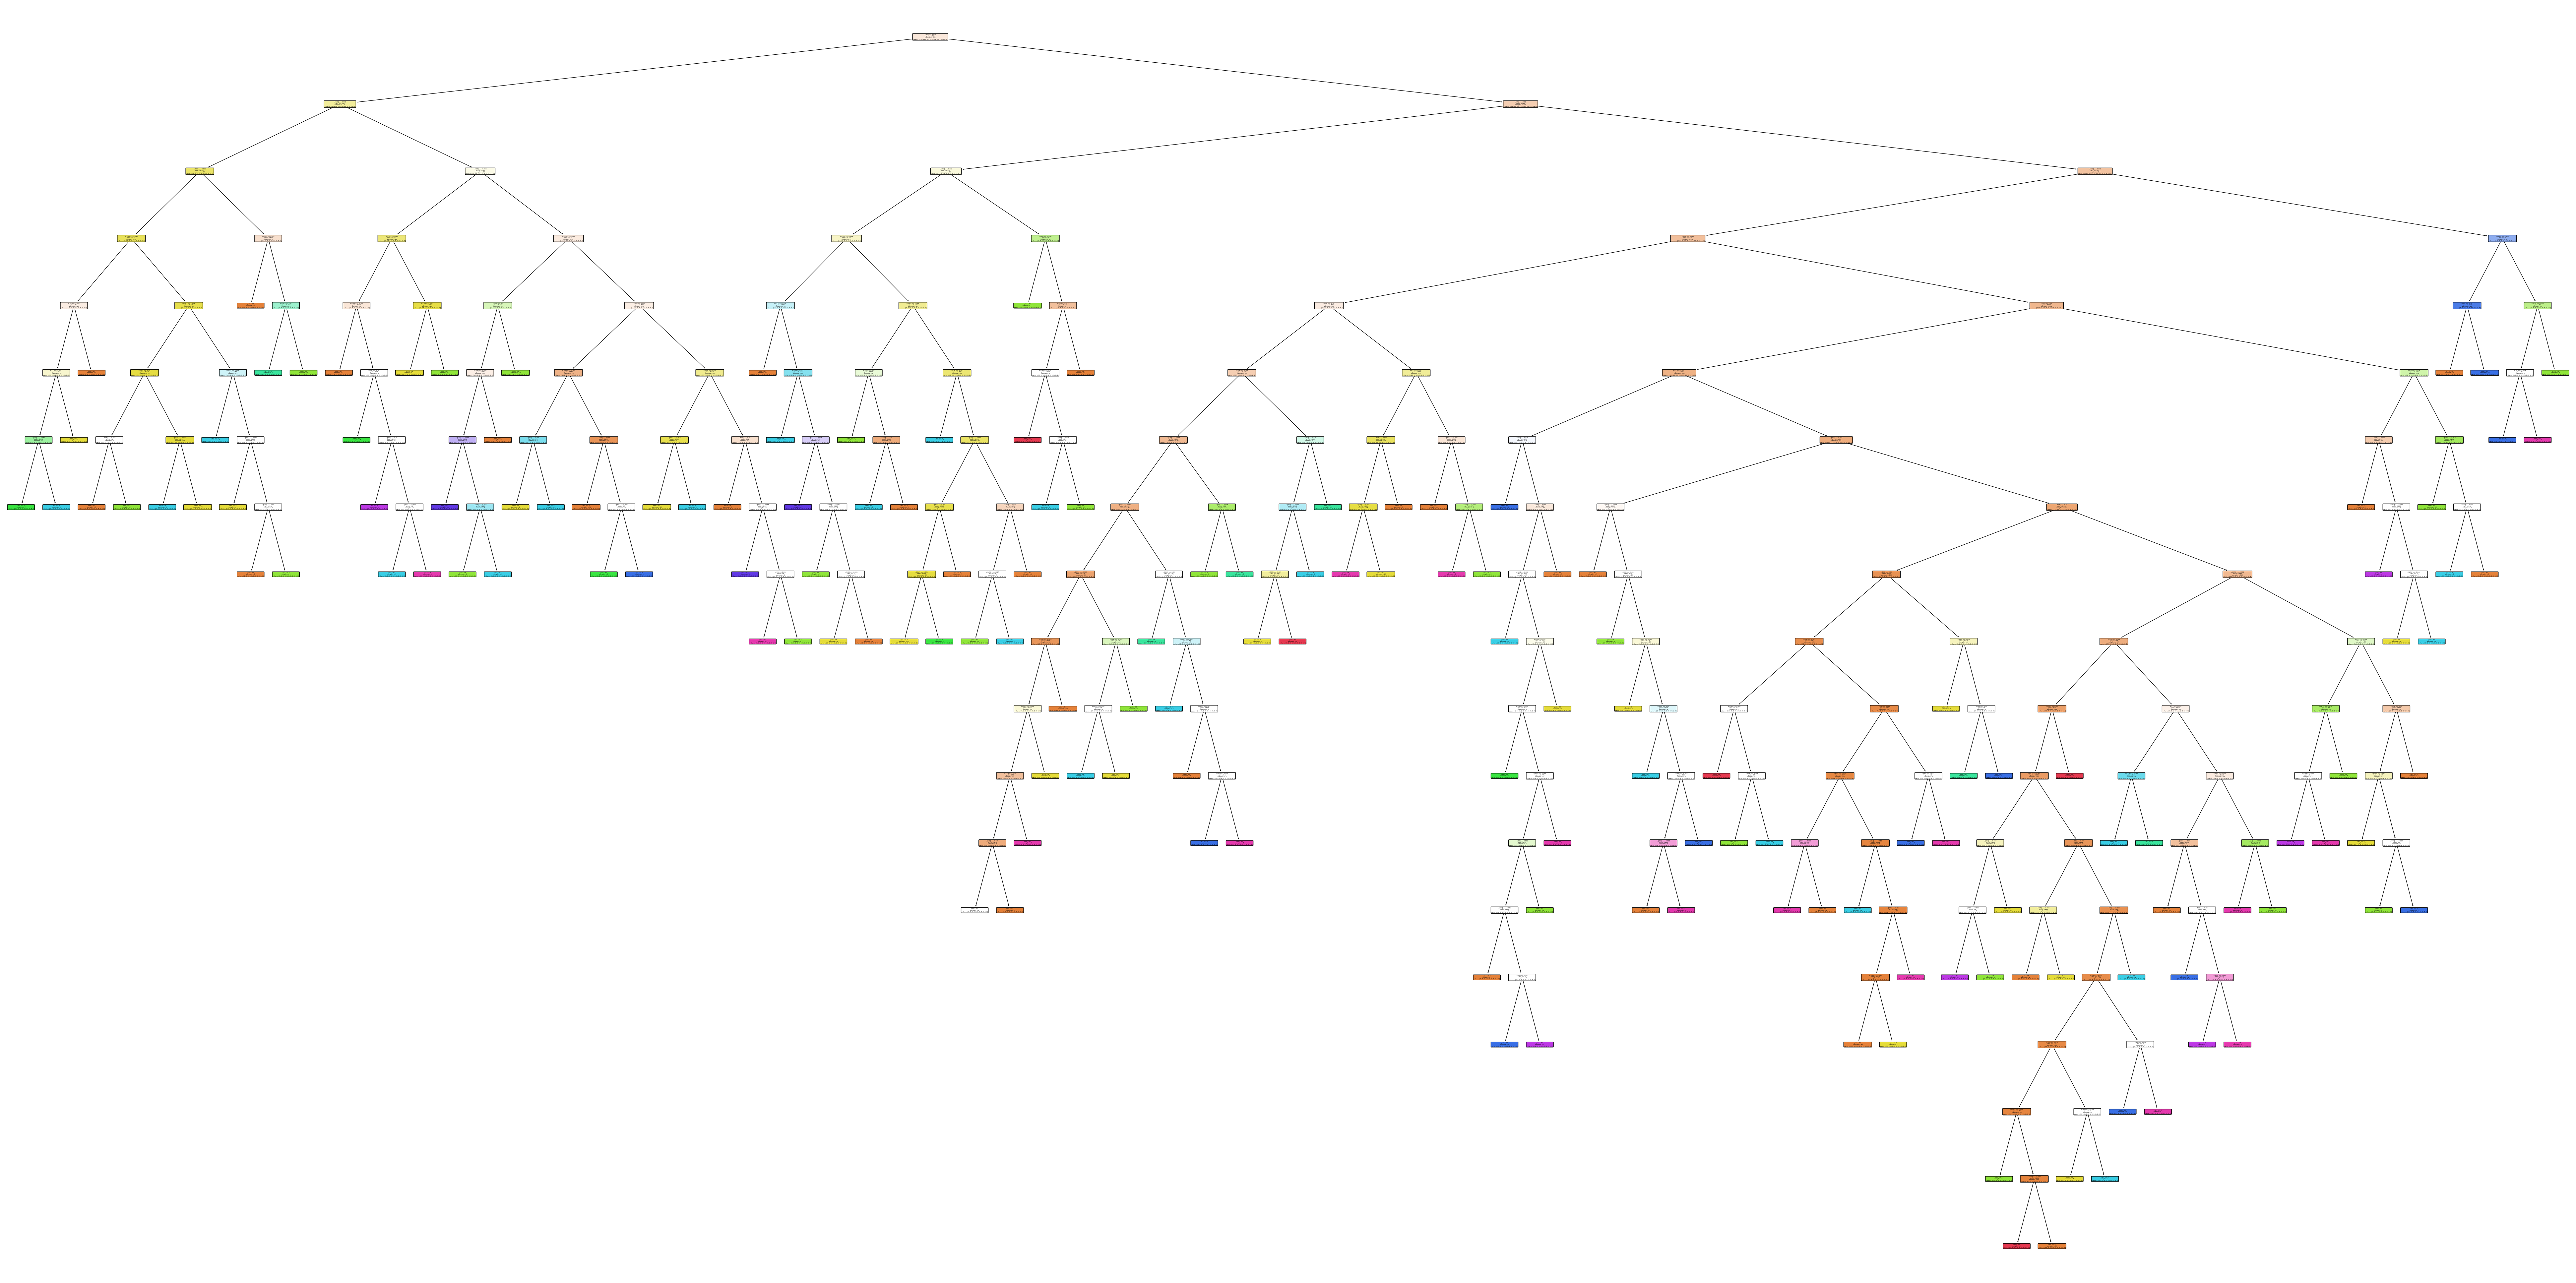

In [13]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(100,50))
plot_tree(model, filled=True,rounded=True)
plt.show()

In [14]:
mode_l = DecisionTreeClassifier(max_depth=5)
mode_l.fit(X_train, y_train)
y_train_pred = mode_l.predict(X_train)
y_test_pred = mode_l.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")
# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(100, 90))
plot_tree(mode_l, filled=True,rounded=True)
plt.show()


Training Set Accuracy: 0.69
Test Set Accuracy: 0.52


Training Set Accuracy: 1.00
Test Set Accuracy: 0.37


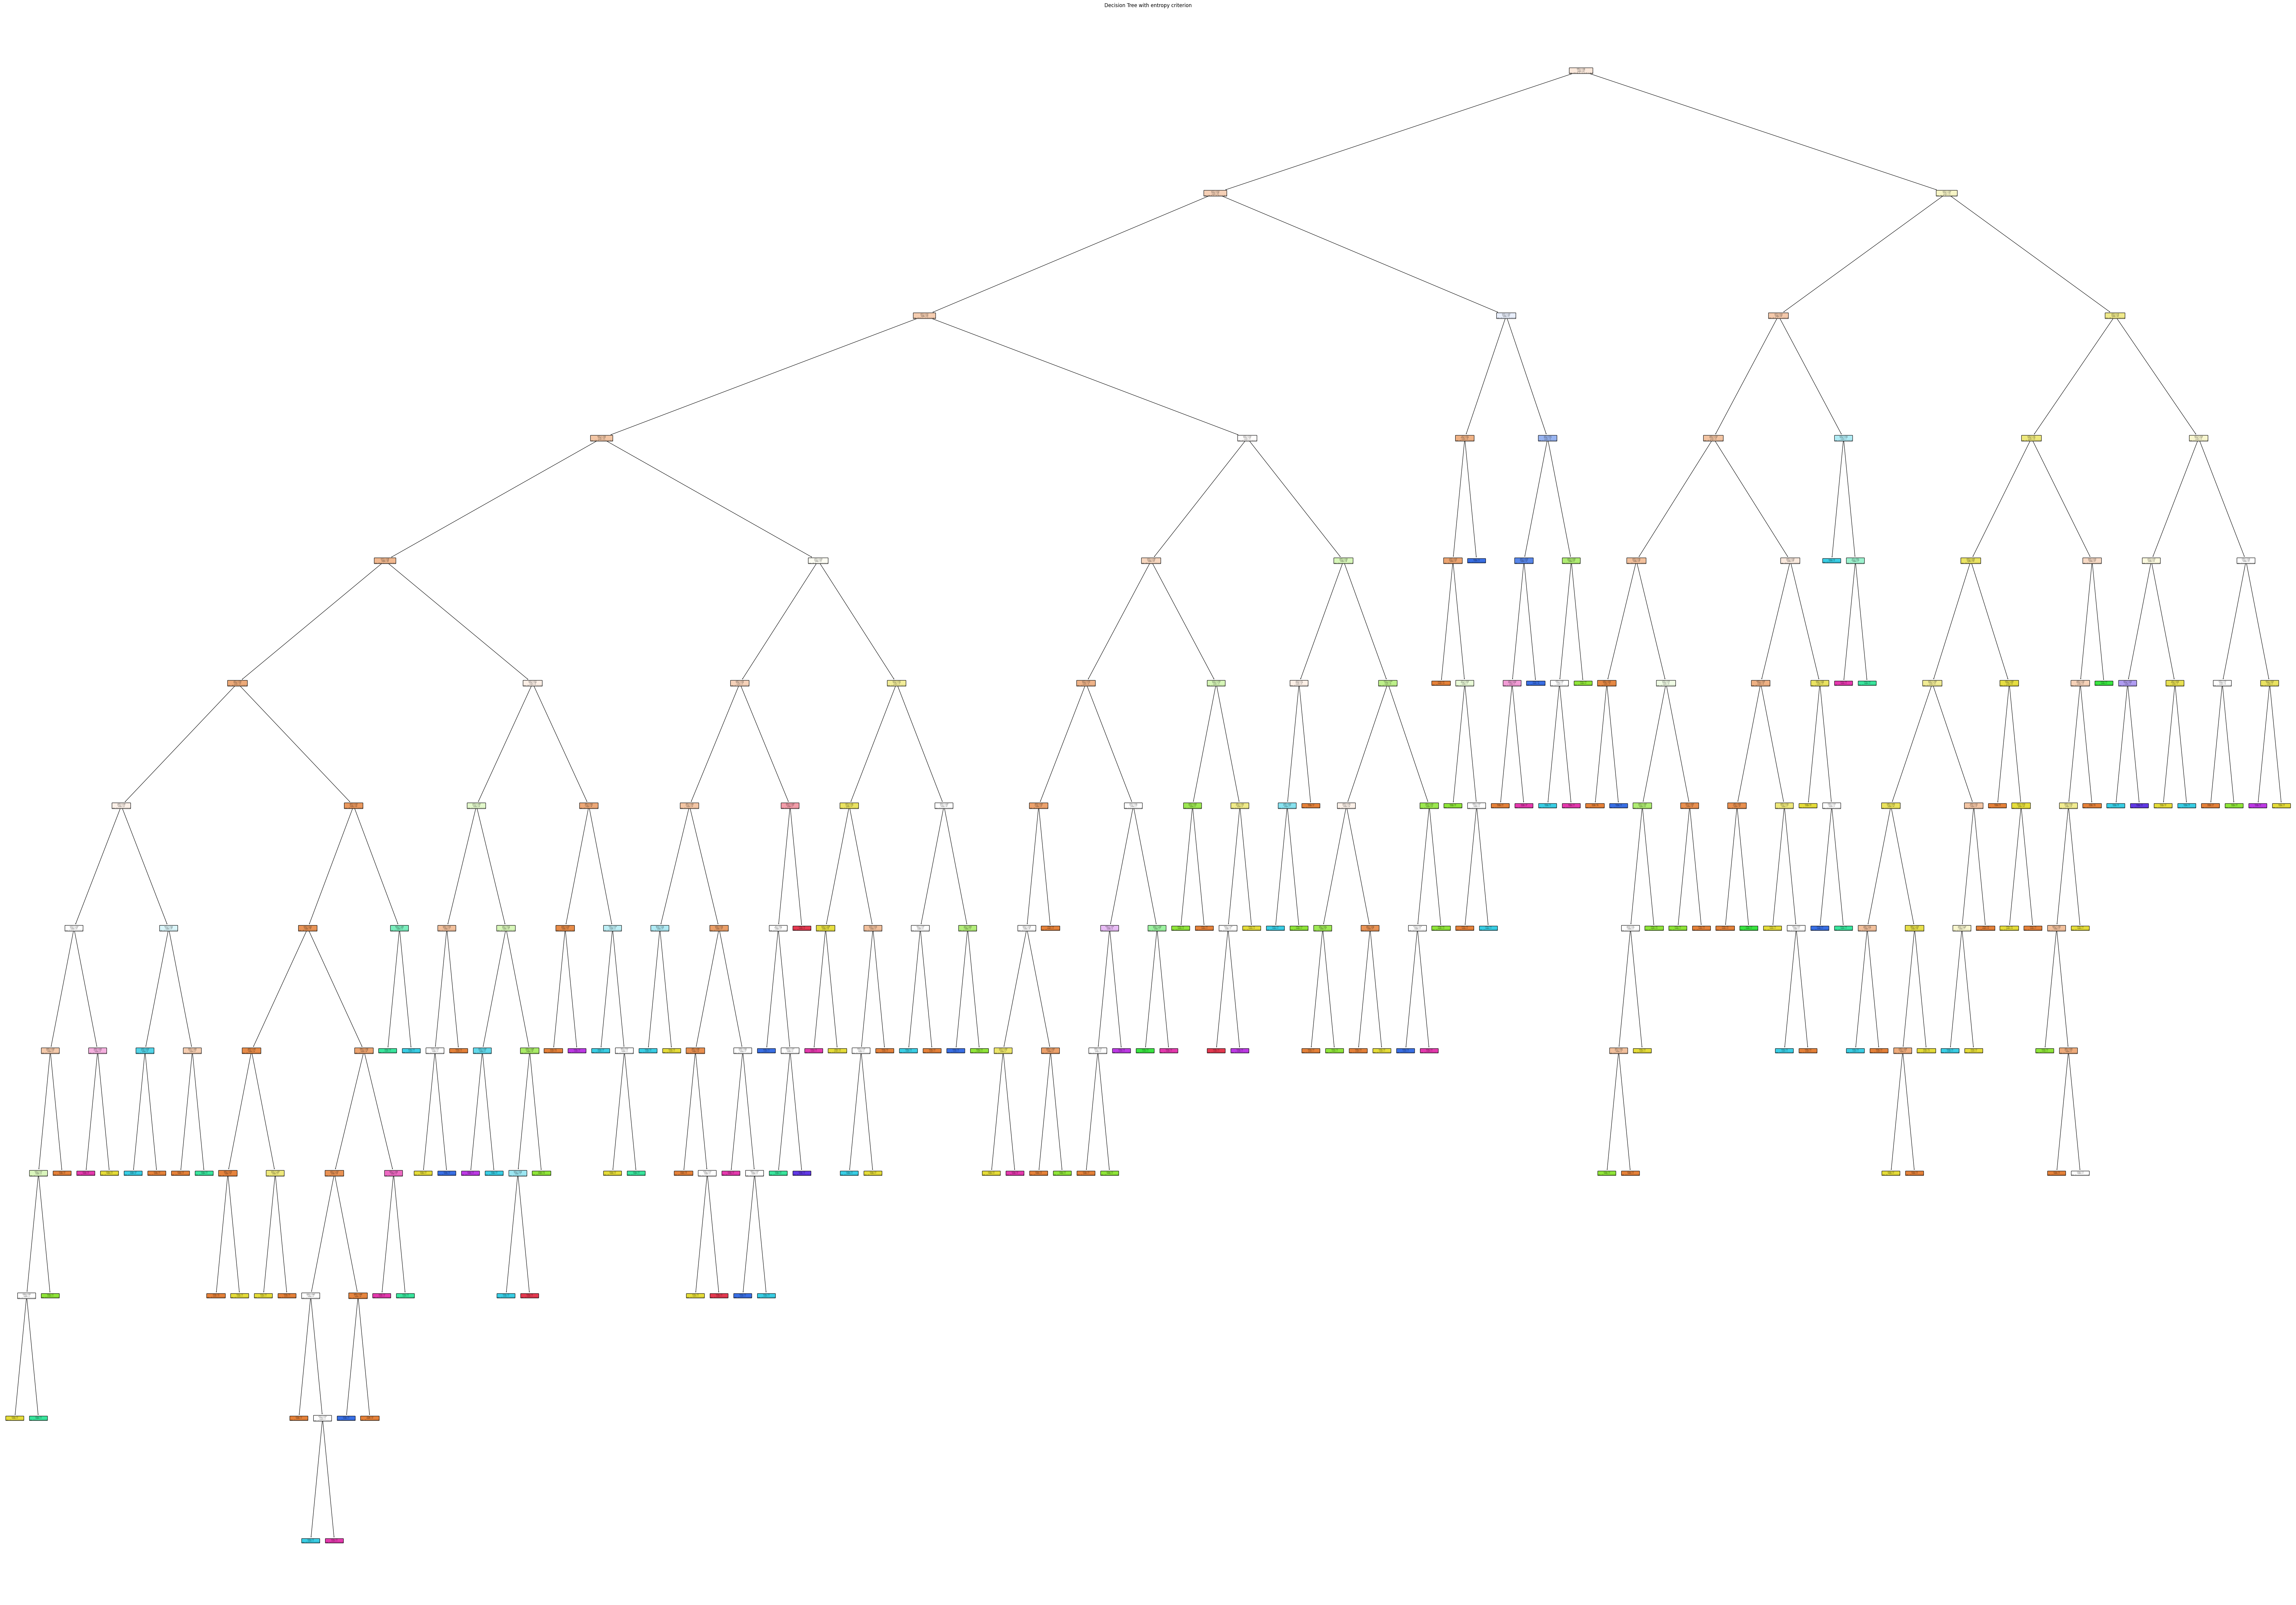

In [15]:
model_entropy = DecisionTreeClassifier(criterion="entropy")
# Fit the model to the training data
model_entropy.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred_entropy = model_entropy.predict(X_train)
y_test_pred_entropy = model_entropy.predict(X_test)

# Calculate accuracies for the "entropy" criterion
train_accuracy_entropy = accuracy_score(y_train, y_train_pred_entropy)
test_accuracy_entropy = accuracy_score(y_test, y_test_pred_entropy)

#print("Using 'entropy' criterion:")
print(f"Training Set Accuracy: {train_accuracy_entropy:.2f}")
print(f"Test Set Accuracy: {test_accuracy_entropy:.2f}")

# Plot the Decision Tree with entropy criterion
plt.figure(figsize=(100,70))
plot_tree(model_entropy, filled=True,rounded=True)
plt.title("Decision Tree with entropy criterion")
plt.show()


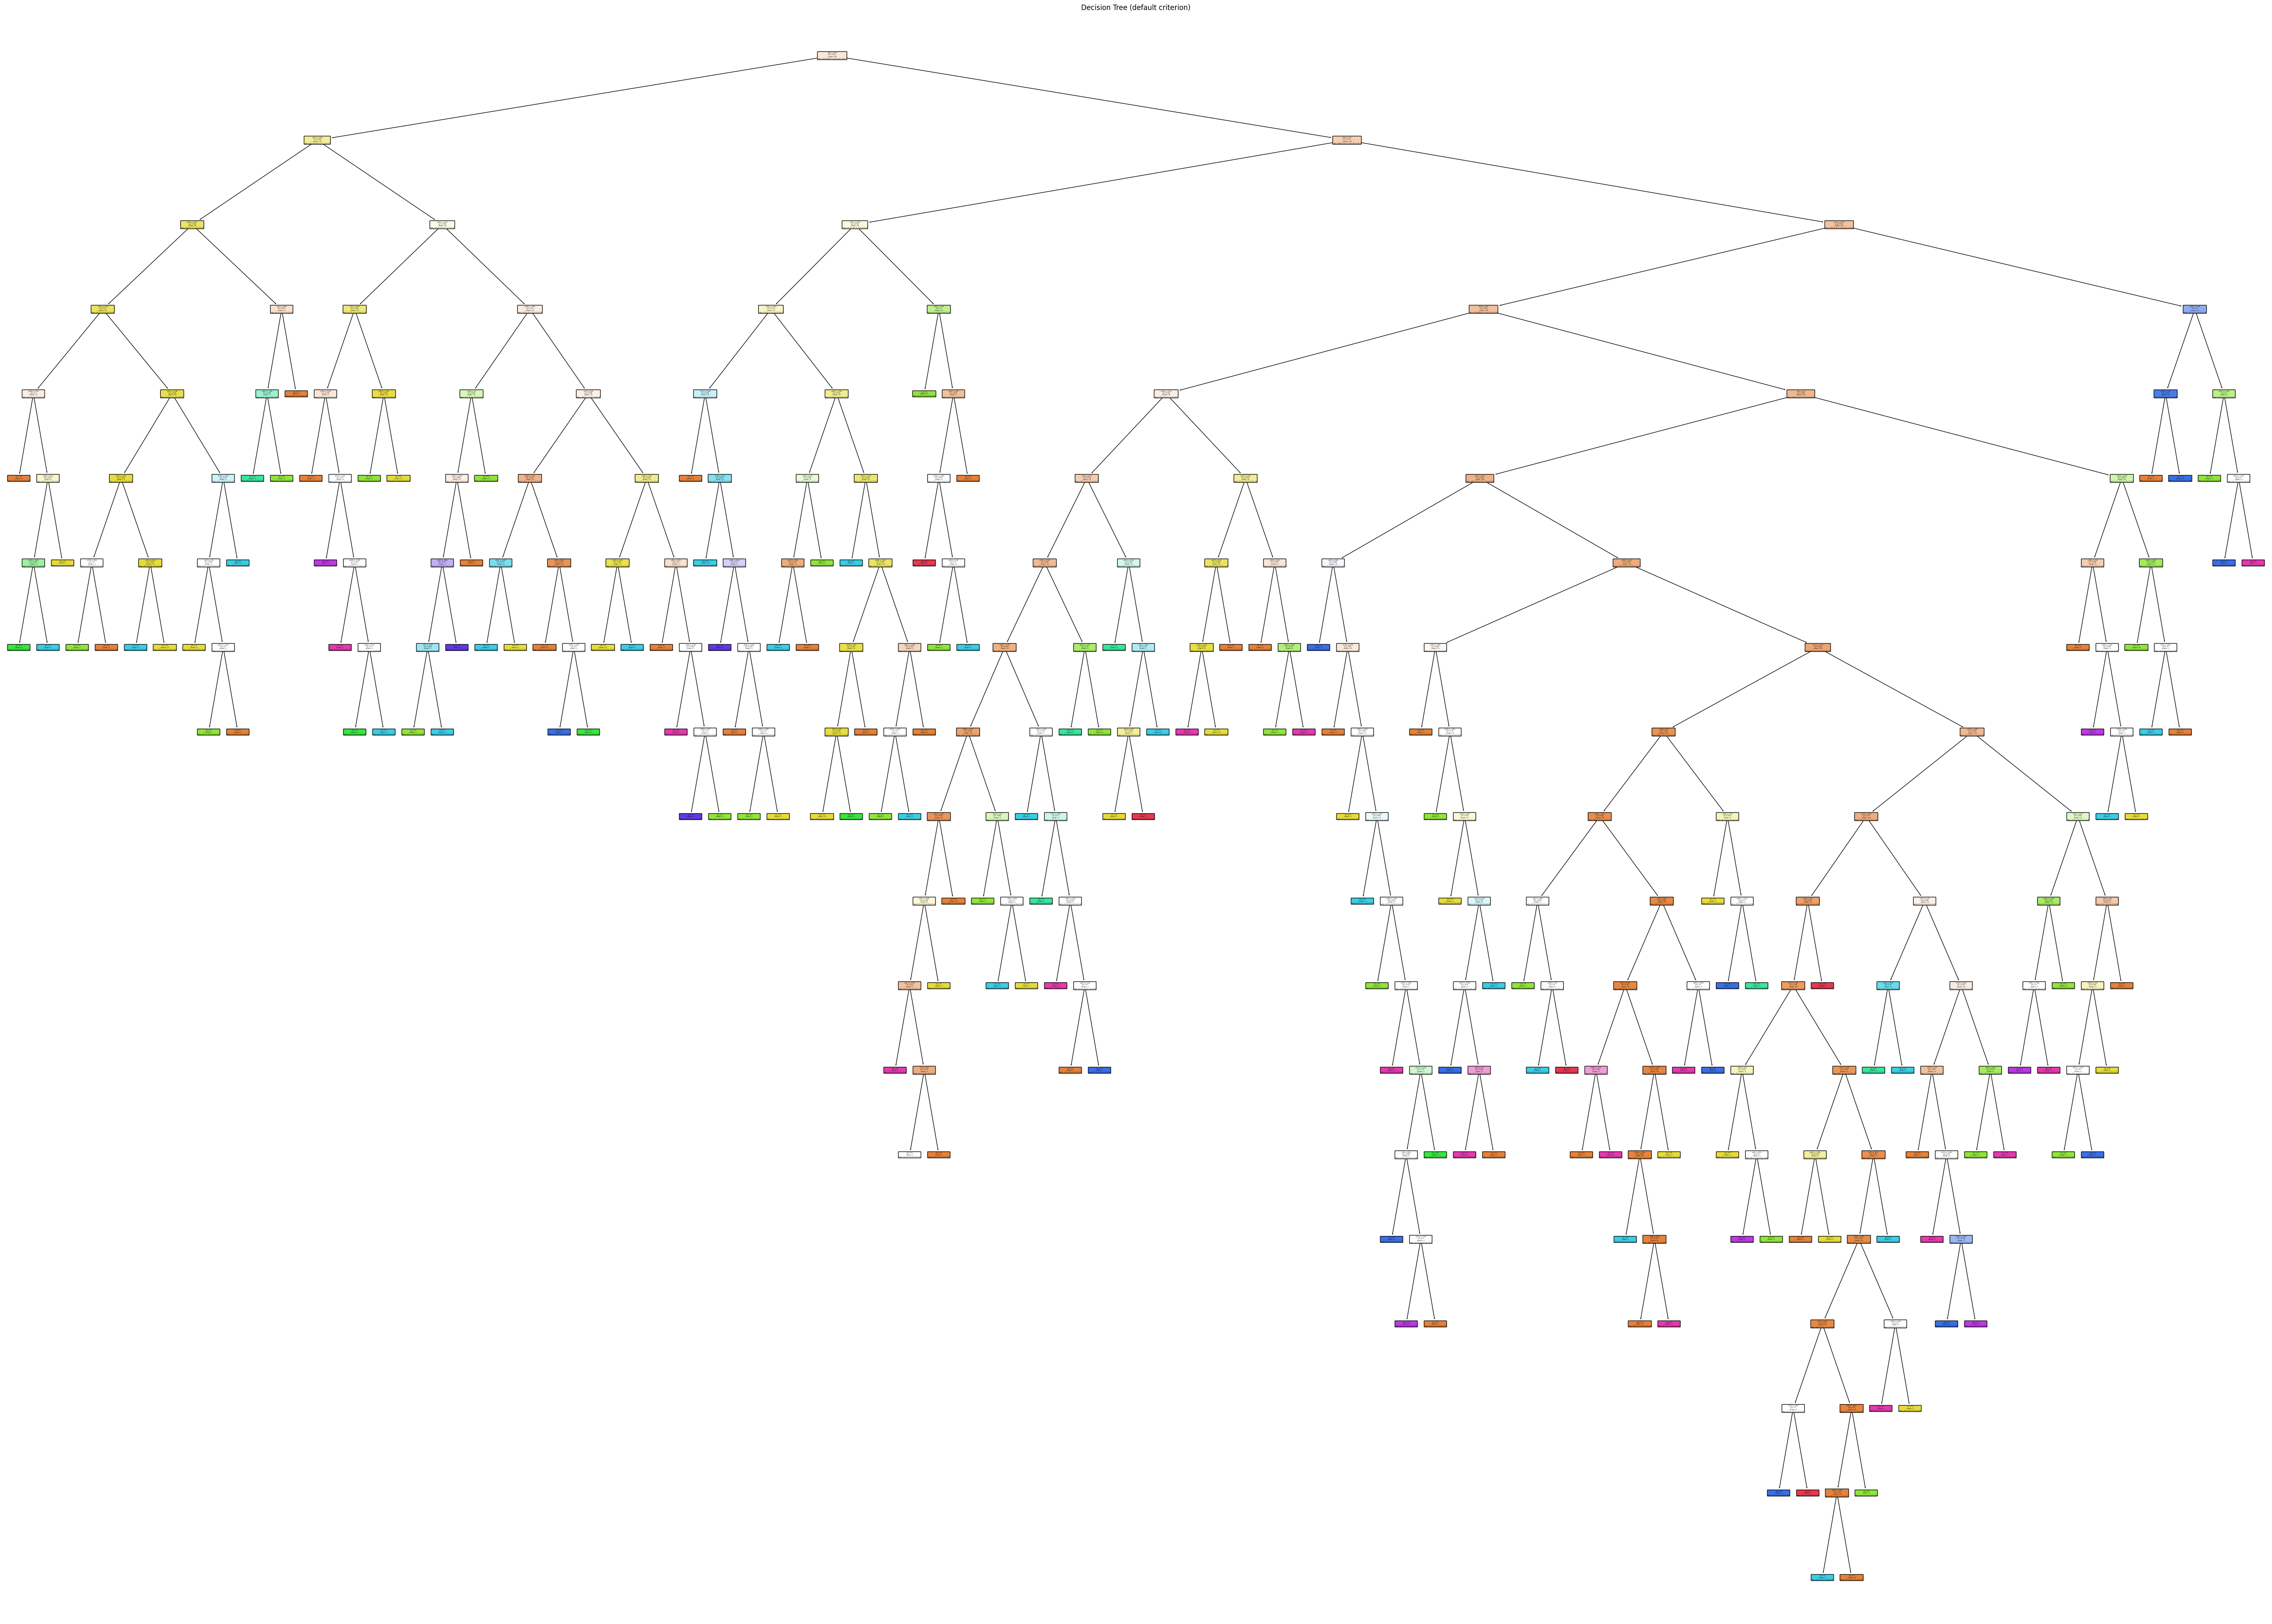

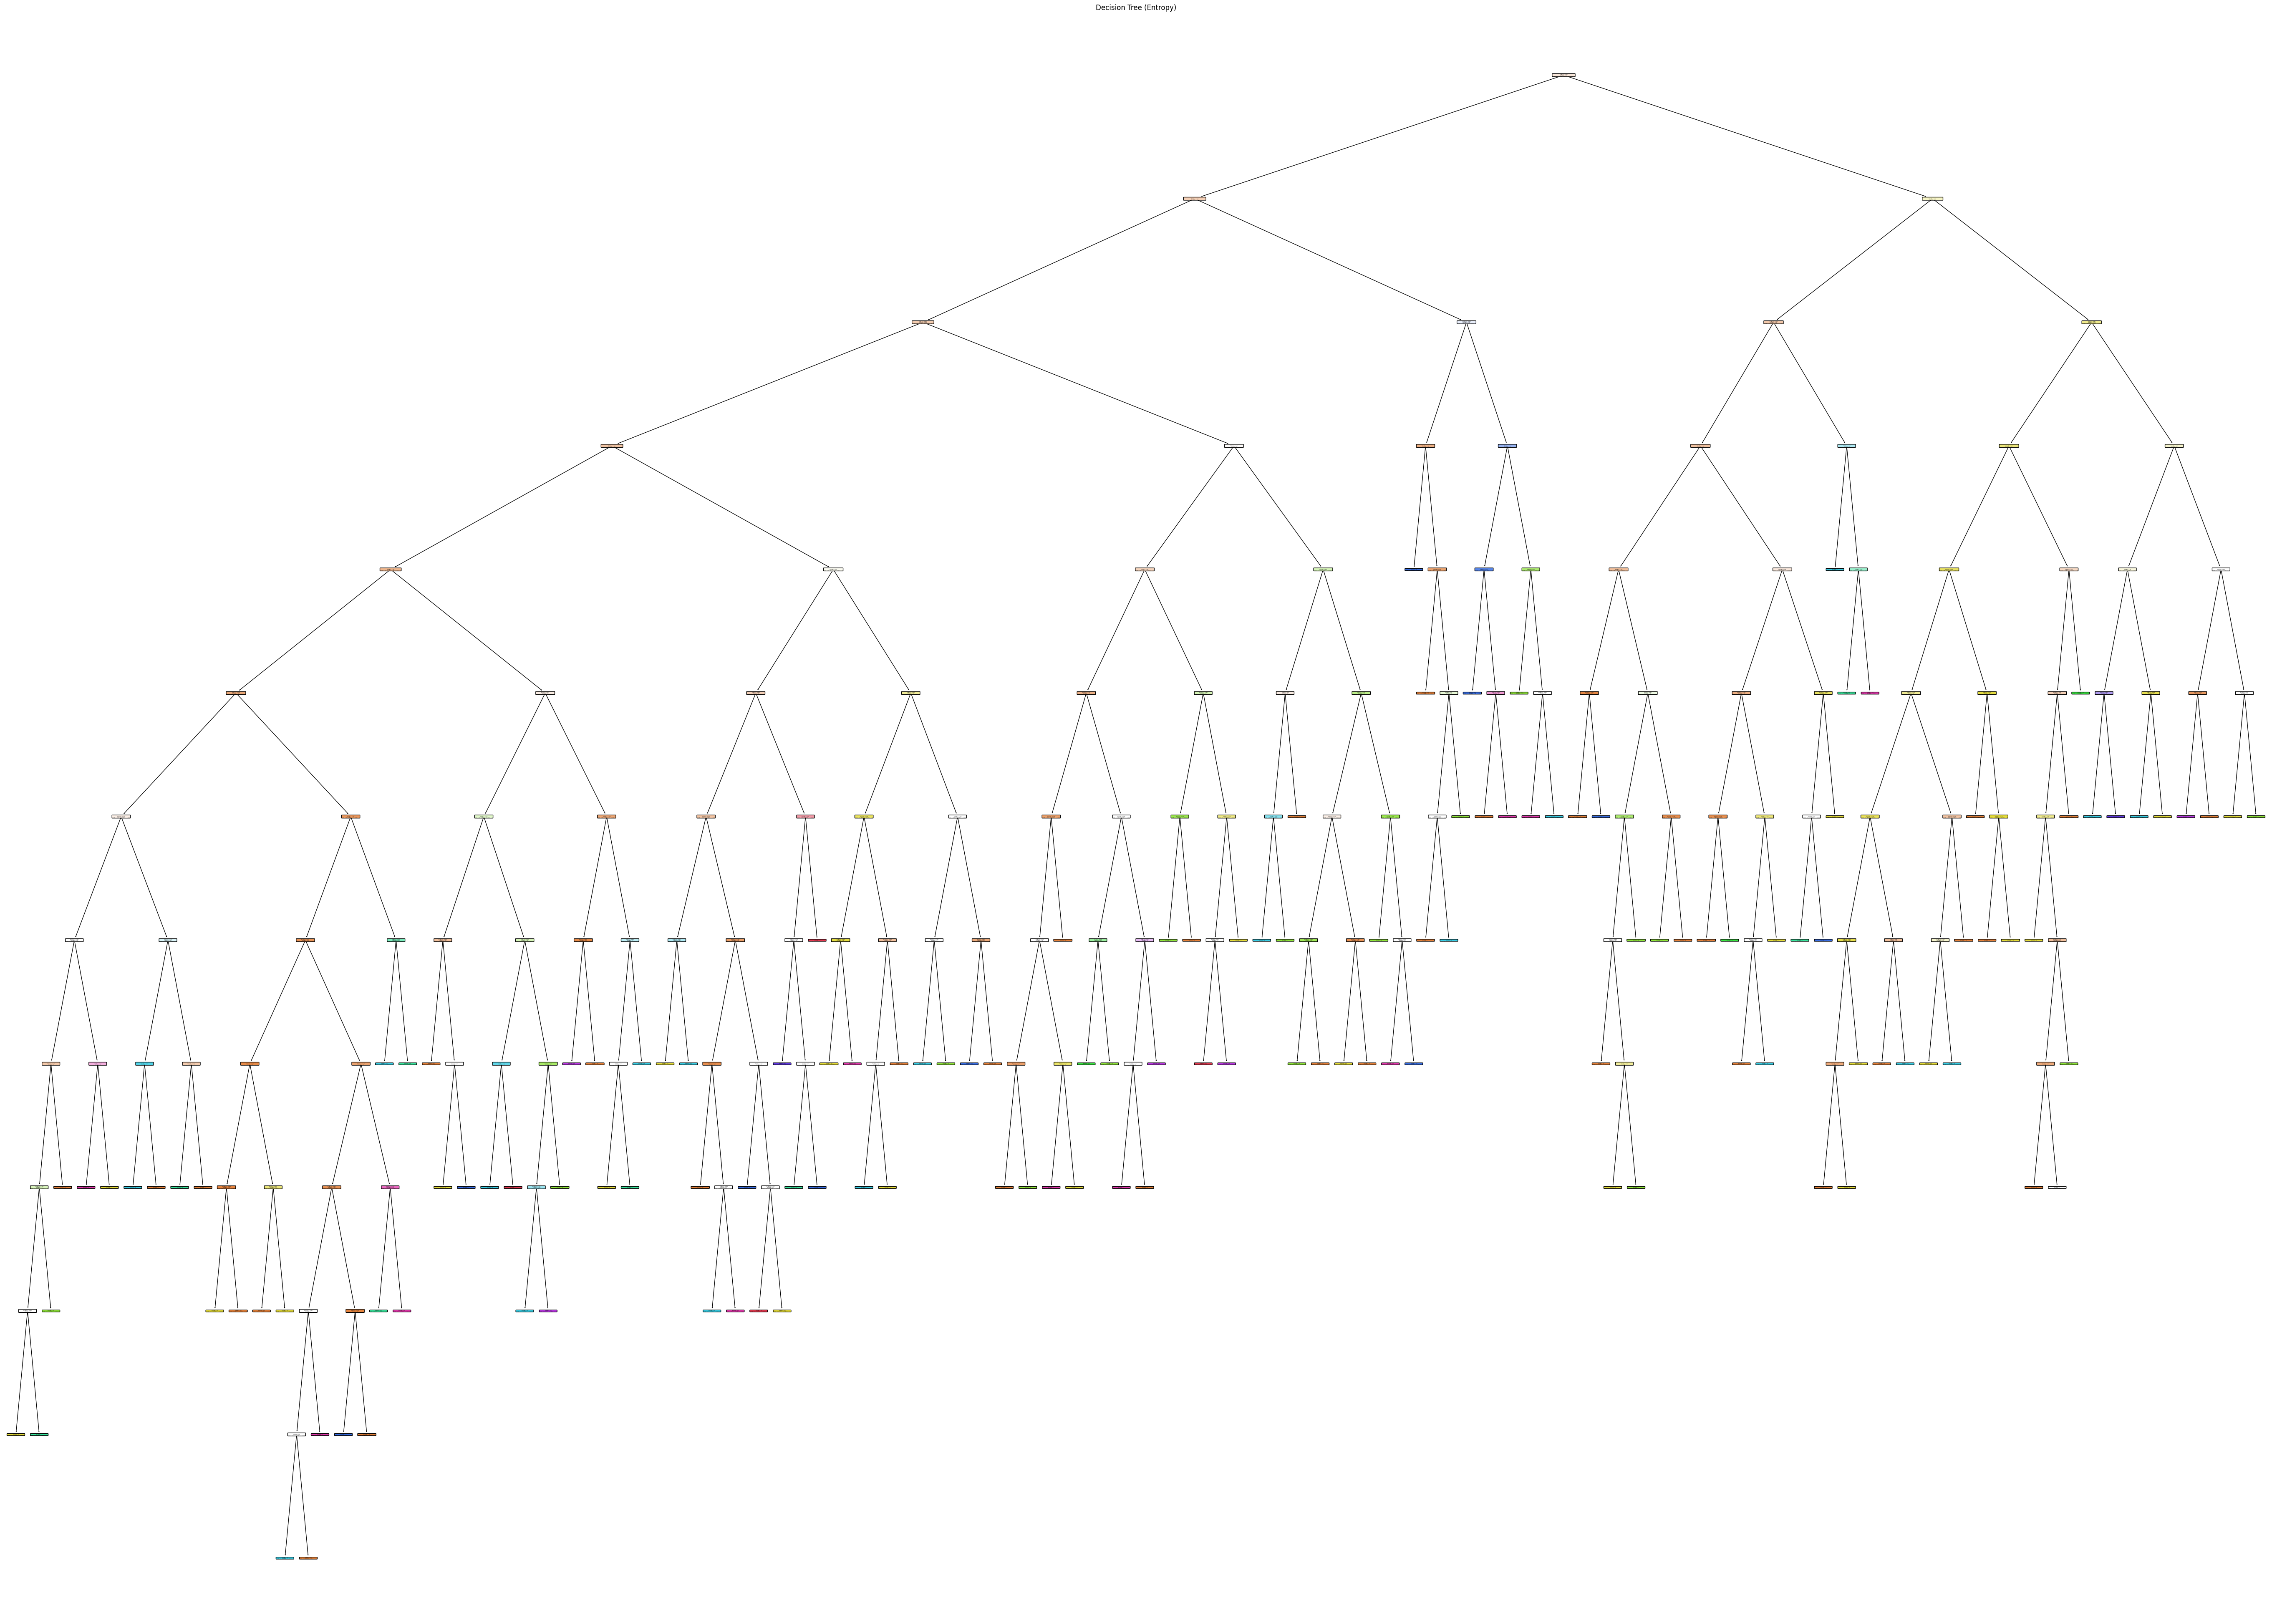

In [16]:
#default criterion
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_dt =dt.predict(X_test)
#entropy criterion
ec = DecisionTreeClassifier(criterion="entropy")
ec.fit(X_train, y_train)
y_ec = ec.predict(X_test)
#tree for default
plt.figure(figsize=(70, 50))
plot_tree(dt, filled=True,rounded=True)
plt.title("Decision Tree (default criterion)")
plt.show()
# tree for Entropy
plt.figure(figsize=(70, 50))
plot_tree(ec, filled=True, rounded=True)
plt.title("Decision Tree (Entropy)")
plt.show()


In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train a Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = decision_tree.predict(X_test)

# Calculate performance metrics for the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_score_dt}")
print("Confusion Matrix:")
print(confusion_matrix_dt)

# Create and train a Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest.predict(X_test)

# Calculate performance metrics for the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_score_rf = f1_score(y_test, y_pred_rf, average='weighted')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_score_rf}")
print("Confusion Matrix:")
print(confusion_matrix_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier Metrics:
Accuracy: 0.4311111111111111
Precision: 0.4472663139329806
Recall: 0.4311111111111111
F1 Score: 0.43761554561868815
Confusion Matrix:
[[45 10 15  1  2  5  4  1  3  5  0]
 [ 9 40  9  1  1  2  1  0  1  0  0]
 [11  3  6  0  1  3  0  0  1  1  0]
 [ 0  3  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  2  1  0  0  0  0  1]
 [ 9  1  1  1  1  0  0  0  0  1  0]
 [ 0  1  2  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  1  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  1  0  0]
 [ 1  2  2  0  0  0  0  0  0  0  0]]

Random Forest Classifier Metrics:
Accuracy: 0.6044444444444445
Precision: 0.5621018518518518
Recall: 0.6044444444444445
F1 Score: 0.5221429602747343
Confusion Matrix:
[[83  7  1  0  0  0  0  0  0  0]
 [15 49  0  0  0  0  0  0  0  0]
 [25  0  1  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  2  0  0  0  0  0]
 [11  3  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  1  0  0  0]
 [ 3  1  0  0  0  0  0  0  0  0]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier with various parameters

# n_estimators: Number of decision trees in the forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# max_depth: Maximum depth of each decision tree
# min_samples_split: Minimum number of samples required to split an internal node
# min_samples_leaf: Minimum number of samples required to be at a leaf node
rf_classifier_with_params = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the Random Forest classifiers to the training data
rf_classifier.fit(X_train, y_train)
rf_classifier_with_params.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)
y_pred_with_params = rf_classifier_with_params.predict(X_test)

# Calculate accuracy for both models
accuracy_default = accuracy_score(y_test, y_pred)
accuracy_with_params = accuracy_score(y_test, y_pred_with_params)

print("Random Forest Classifier (Default Parameters) Accuracy:", accuracy_default)
print("Random Forest Classifier (With Parameters) Accuracy:", accuracy_with_params)

# Accessing important attributes of the Random Forest model

# Feature importances
feature_importances = rf_classifier.feature_importances_
print("Feature Importances (Default Parameters):", feature_importances)

# Estimators (individual decision trees in the forest)
estimators = rf_classifier.estimators_
print("Number of Estimators (Default Parameters):", len(estimators))


Random Forest Classifier (Default Parameters) Accuracy: 0.6088888888888889
Random Forest Classifier (With Parameters) Accuracy: 0.5911111111111111
Feature Importances (Default Parameters): [0.00081073 0.00136727 0.001516   0.00116015 0.00222459 0.00147907
 0.00101981 0.00118203 0.00138292 0.00127399 0.00065996 0.00159414
 0.00105459 0.00084908 0.00081055 0.00062285 0.00043314 0.00251954
 0.00104737 0.00115303 0.0010905  0.00091945 0.00112076 0.00136292
 0.00270688 0.0013967  0.00149363 0.00247417 0.00262654 0.00053249
 0.00184764 0.0016103  0.00197388 0.00246866 0.00112759 0.00070672
 0.00134208 0.00134832 0.00056191 0.0018244  0.00063057 0.00163573
 0.00047039 0.00160116 0.00142279 0.00132069 0.00076194 0.00139654
 0.00133835 0.00143733 0.00156502 0.00150017 0.00110472 0.00150291
 0.00134385 0.00102366 0.00321215 0.00084047 0.00053752 0.0010752
 0.00122401 0.00114046 0.00078993 0.00107852 0.00095285 0.00119085
 0.00179124 0.00670233 0.00071428 0.00124317 0.00114775 0.003223
 0.0013583